(https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Cassandra1.jpeg/800px-Cassandra1.jpeg)
## Notebook to run serial methods

With this notebook you can run live/backtest Kaissandra, plot live results and much more

In [1]:
import sys
import os

this_path = os.getcwd()
path = '\\'.join(this_path.split('\\')[:-1])+'\\'
if path not in sys.path:
    sys.path.insert(0, path)
    print(path+" added to python path")
else:
    print(path+" already in python path")
    
import pandas as pd
import datetime as dt
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2


C:\Users\mgutierrez\root\Projects\SDC\py\kaissandra\ added to python path


## Init Util Functions and Constants 

In [ ]:
def get_positions_filename(asset, open_dt, close_dt):
    """  """
    
    dt_open = dt.datetime.strftime(dt.datetime.strptime(
            open_dt,'%Y.%m.%d %H:%M:%S'),'%y%m%d%H%M%S')
    dt_close = dt.datetime.strftime(dt.datetime.strptime(
            close_dt,'%Y.%m.%d %H:%M:%S'),'%y%m%d%H%M%S')
    filename = 'O'+dt_open+'C'+dt_close+asset
    return filename

In [195]:
live = False
config_name = 'T0007'#'T0003'
if live:
    ext = '_LI_'
    directory = 'kaissandra_live/live'
    start_time = '19_01_27_23_18_41'
else:
    ext = '_BT_'
    directory = 'back_test'
    start_time = '19_02_19_14_23_40'#'19_02_15_17_30_37'
results_dir = '../../RNN/resultsLive/'+directory+'/trader/'
pos_dirname = results_dir
pos_filename = start_time+ext+"positions_soll.log"
positions_dir = '../../RNN/resultsLive/'+directory+'/positions/'+start_time+'/'
filename = results_dir+start_time+ext+config_name+"positions_soll.log"
positions = pd.read_csv(filename).sort_values(by=['Entry Time']).reset_index().drop(labels='index',axis=1)
#print(positions)

T0012
Total GROI = 2.49% Total ROI = 1.65% total profit = 164.73e mean spread = 2.62 pips expected mean spread = 2.52 pips 
Number entries 32 GSP = 65.62%  NSP = 56.25%  av win = 0.237%  av lose = -0.226% 
Percent below 2p 46.88%
-0.7589237362875474
T0013
Total GROI = 2.49% Total ROI = 1.65% total profit = 164.73e mean spread = 2.62 pips expected mean spread = 2.52 pips 
Number entries 32 GSP = 65.62%  NSP = 56.25%  av win = 0.237%  av lose = -0.226% 
Percent below 2p 46.88%
-0.7589237362875474
T0014
Total GROI = 13.47% Total ROI = 7.85% total profit = 784.68e mean spread = 2.37 pips expected mean spread = 2.48 pips 
Number entries 237 GSP = 57.38%  NSP = 53.59%  av win = 0.228%  av lose = -0.175% 
Percent below 2p 50.21%
-1.2659199017953018


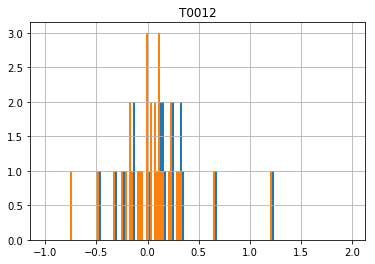

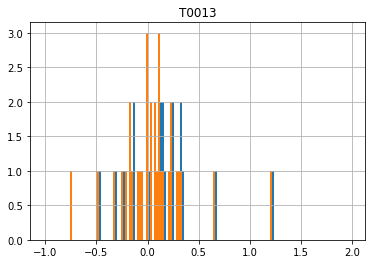

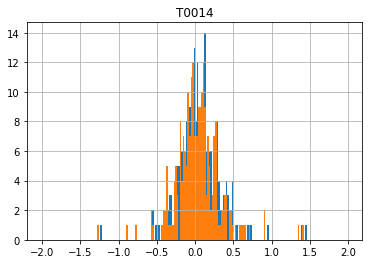

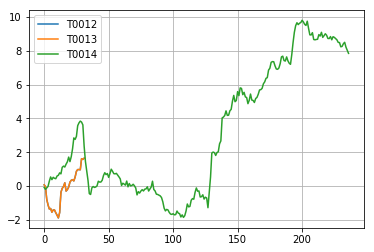

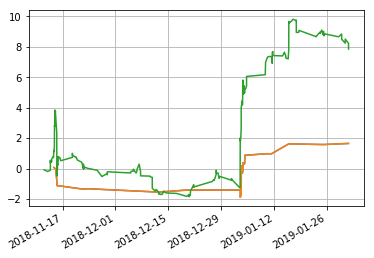

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

import pandas as pd

live = False

#config_names = ['T0004','T0005','T0006','T0007','T0008','']
#legends = ['T0004','T0005','T0006','T0007','T0008','T0003']
#start_times = ['19_02_19_14_23_40','19_02_19_14_23_40','19_02_19_14_23_40','19_02_19_14_23_40','19_02_19_14_23_40','19_02_15_17_30_37']#

#config_names = ['T0009','T0010','T0011']#['T0004','T0005','T0006','T0007','T0008','']
#legends = ['T0009','T0010','T0011']#['T0004','T0005','T0006','T0007','T0008','T0003']
#start_times = ['19_02_21_20_34_40','19_02_21_20_34_40','19_02_21_20_34_40']#['19_02_19_14_23_40','19_02_19_14_23_40','19_02_19_14_23_40','19_02_19_14_23_40','19_02_19_14_23_40','19_02_15_17_30_37']#

config_names = ['T0012','T0013','T0014']
start_times = ['19_02_23_14_35_10','19_02_23_14_35_10','19_02_23_14_35_10']
legends = config_names

if live:
    ext = '_LI_'
    directory = 'kaissandra_live/live'
    start_time = '19_01_27_23_18_41'
else:
    ext = '_BT_'
    directory = 'back_test'
    #start_time = '19_02_15_17_30_37'#'19_02_19_14_23_40'
results_dir = '../../RNN/resultsLive/'+directory+'/trader/'
pos_dirname = results_dir
#pos_filename = start_time+ext+"positions_soll.log"
filenames = [results_dir+start_times[i]+ext+config_names[i]+"positions_soll.log" for i in range(len(config_names))]
positions_list =  [pd.read_csv(filename).sort_values(by=['Entry Time']).reset_index().drop(labels='index',axis=1) for filename in filenames]
#print(positions)

for i in range(len(config_names)):
    #print(positions.GROI.sum())
    #print(positions.ROI.sum())
    #print(positions.Profit.sum())
    #print(positions.Profit)
    config_name = config_names[i]
    print(config_name)
    positions = positions_list[i]
    
    tgroi = positions['GROI'].sum()
    troi = positions['ROI'].sum()
    tprofit = positions['Profit'].sum()
    mspread = positions['Spread'].mean()
    emspread = positions['E_spread'].mean()
    SIs = positions.agg({'GROI': lambda x: 100*np.sum(x>0)/len(x),
                          'ROI': lambda x: 100*np.sum(x>0)/len(x)})
    av_win = sum(positions[positions['GROI']>0]['GROI'])/len(positions[positions['GROI']>0]['GROI'])
    av_lose = sum(positions[positions['GROI']<0]['GROI'])/len(positions[positions['GROI']<0]['GROI'])
    per_under_2p = 100*positions[positions['Spread']<0.02].shape[0]/positions.shape[0]

    print("Total GROI = {0:.2f}% ".format(tgroi)+"Total ROI = {0:.2f}% ".format(troi)+\
          "total profit = {0:.2f}e ".format(tprofit)+"mean spread = {0:.2f} pips ".format(100*mspread)+
          "expected mean spread = {0:.2f} pips ".format(100*emspread))
    print("Number entries "+str(positions.shape[0])+" GSP = {0:.2f}% ".format(SIs['GROI'])\
          +" NSP = {0:.2f}% ".format(SIs['ROI'])+" av win = {0:.3f}% ".format(av_win)+" av lose = {0:.3f}% ".format(av_lose))
    print("Percent below 2p {0:.2f}%".format(per_under_2p))
    #print(pd.DataFrame(prob_rois))
    grouped = positions.groupby(['Asset'])
    #print(grouped.get_group(('GBPJPY',1)).to_string())
    #grouped.aggregate(np.sum)
    #grouped['groi'].describe()
    #grouped.get_group('GBPJPY')
    SI = grouped.agg({'GROI': lambda x: np.sum(x>0)/len(x),
                 'ROI': lambda x: np.sum(x>0)/len(x)})#.rename(['GSI','NSI'])
    grouped.agg({'E_spread': lambda x: 100*np.sum(x<0.02)/len(x)})
    #print(SI)
    #print(grouped.describe())
    #for name, group in grouped:
        #print(name)
    #    print(group.to_string())
    
    plt.figure(i)
    gran = 100
    min_h = int(gran*np.floor(positions['GROI'].min()))
    max_h = int(gran*np.ceil(positions['GROI'].max()))
    print(positions['ROI'].min())
    #print(positions['GROI'].max())
    bins = [i/gran for i in range(min_h,max_h,2)]
    histG = plt.hist(positions['GROI'], bins=bins)
    histR = plt.hist(positions['ROI'], bins=bins)
    plt.grid()
    plt.title(config_name)

    #pos_under_thr.index = range(pos_under_thr.shape[0])
    plt.figure(100)
    #plt.plot(range(positions.shape[0]),positions['GROI'].cumsum())
    plt.plot(range(positions.shape[0]),positions['ROI'].cumsum(),label=legends[i])
    plt.grid()
    plt.legend()

    list_dates = [dt.datetime.strptime(date, '%Y.%m.%d %H:%M:%S') for date in positions['Entry Time']]
    dates = matplotlib.dates.date2num(list_dates)
    plt.figure(101)
    #plt.plot_date(list_dates, positions['GROI'].cumsum(),fmt='-')
    plt.plot_date(list_dates, positions['ROI'].cumsum(),fmt='-',label=legends[i])
    plt.gcf().autofmt_xdate()
    plt.grid()
    #plt.legend()

In [285]:
from kaissandra.config import *

configT4=retrieve_config('T0004')
print(configT4['netNames'])
print(configT4['list_spread_ranges'])
print(positions_list[0]['strategy'].unique())
configT5=retrieve_config('T0005')
print(configT5['list_name'])
print(positions_list[1]['strategy'].unique())
print(configT5['list_feats_from'])
configT6=retrieve_config('T0006')
print(configT6['list_name'])
print(positions_list[2]['strategy'].unique())
#print(configT6)
configT7=retrieve_config('T0007')
print(configT7['list_name'])
print(positions_list[3]['strategy'].unique())
print(configT7['list_spread_ranges'])
configT8=retrieve_config('T0008')
print(configT8['list_name'])
print(positions_list[4]['strategy'].unique())
print(configT8['list_feats_from'])
configT3=retrieve_config('T0003')
print(configT3['list_name'])
print(configT3['netNames'])
print(configT3['list_spread_ranges'])

Config file ../../config/T0004.config loaded from disk
['350E13T3S', '350E6T2L', '327T21E0S', '500E29T3L']
[{'sp': [2.5], 'th': [(0.55, 0.6)], 'dir': 'S'}, {'sp': [2.5], 'th': [(0.65, 0.65)], 'dir': 'L'}, {'sp': [2.5], 'th': [(0.75, 0.7)], 'dir': 'S'}, {'sp': [2.5], 'th': [(0.7, 0.6)], 'dir': 'L'}]
['100350L_6_1_.65_.55' '100500L_29_3_.7_.6' '100350S_13_3_.65_.6']
Config file ../../config/T0005.config loaded from disk
['100350S_13_3_.65_.6', '100350L_6_1_.65_.55']
['100350L_6_1_.65_.55' '100350S_13_3_.65_.6']
['B', 'B']
Config file ../../config/T0006.config loaded from disk
['100327S_21_0_.75_.7', '100500L_29_3_.7_.6']
['100500L_29_3_.7_.6']
Config file ../../config/T0007.config loaded from disk
['100350S_13_3_.65_.6', '100350L_6_1_.65_.55', '100327S_21_0_.75_.7', '100500L_29_3_.7_.6']
['100350L_6_1_.65_.55' '100500L_29_3_.7_.6' '100350S_13_3_.65_.6']
[{'sp': [2.5], 'th': [(0.55, 0.6)], 'dir': 'S'}, {'sp': [2.5], 'th': [(0.65, 0.65)], 'dir': 'L'}, {'sp': [2.5], 'th': [(0.75, 0.7)], 'di

In [ ]:
positions_list[2].sort_values(by=['ROI'],ascending=True).reset_index()

## Build Stats File and Plot Positions

In [ ]:
columns = ['asset','Di','Ti','Do','To','direction','groi','roi','profit','e_spread','spread','max','min','argmax','argmin','samples','extensions','stoploss','file']

plt_index = 0
idx_config = 2
positions = positions_list[idx_config]
config_name = config_names[idx_config]
start_time = start_times[idx_config]
pos_format = pd.DataFrame(data=0,columns=columns,index=range(positions.shape[0]))
positions_dir = '../../RNN/resultsLive/'+directory+'/positions/'+start_time+config_name+'/'
for p in range(positions.shape[0]):
    print(str(p)+" out of "+str(positions.shape[0]))
    pos_format['asset'].iloc[p] = positions['Asset'].iloc[p]
    pos_format['Di'].iloc[p] = positions['Entry Time'].iloc[p][:10]
    pos_format['Ti'].iloc[p] = positions['Entry Time'].iloc[p][11:]
    pos_format['Do'].iloc[p] = positions['Exit Time'].iloc[p][:10]
    pos_format['To'].iloc[p] = positions['Exit Time'].iloc[p][11:]
    pos_format['groi'].iloc[p] = positions['GROI'].iloc[p]
    pos_format['roi'].iloc[p] = positions['ROI'].iloc[p]
    pos_format['e_spread'].iloc[p] = positions['E_spread'].iloc[p]
    pos_format['spread'].iloc[p] = positions['Spread'].iloc[p]
    pos_format['profit'].iloc[p] = positions['Profit'].iloc[p]
    pos_format['stoploss'].iloc[p] = positions['stoploss'].iloc[p]
    direction = positions['Position'].iloc[p]
    pos_format['direction'].iloc[p] = direction
    filename_pos = get_positions_filename(positions['Asset'].iloc[p], positions['Entry Time'].iloc[p], positions['Exit Time'].iloc[p])
    pos_format['file'].iloc[p] = filename_pos
    pos_ev = pd.read_csv(positions_dir+filename_pos+'.txt', sep=',')
    pos_track = pickle.load( open( positions_dir+filename_pos+".p", "rb" ))
    pos_format['extensions'].iloc[p] = pos_track['n_ext']
    pos_format['samples'].iloc[p] = pos_ev.shape[0]
    #print(pos_ev.columns)
    maxBid = pos_ev['SymbolBid'].max()
    minBid = pos_ev['SymbolBid'].min()
    maxAsk = pos_ev['SymbolAsk'].max()
    minAsk = pos_ev['SymbolAsk'].min()
    Bi = positions['Bi'].iloc[p]
    Ai = positions['Ai'].iloc[p]
    #if direction>0:
    #        GROI_live = roi_ratio*(Ao-Ai)/Ai
    #        spread = (Ao-Bo)/Ai
    #        
    #    else:
    #        GROI_live = roi_ratio*(Bi-Bo)/Ao
    if direction>0:
        pos_format['max'].iloc[p] = 100*(maxAsk-positions['Ai'].iloc[p])/positions['Ai'].iloc[p]
        pos_format['min'].iloc[p] = 100*(minAsk-positions['Ai'].iloc[p])/positions['Ai'].iloc[p]
        pos_format['argmax'].iloc[p] = pos_ev['SymbolAsk'].idxmax()
        pos_format['argmin'].iloc[p] = pos_ev['SymbolAsk'].idxmin()
        groi_ev = 100*(pos_ev['SymbolAsk'].iloc[:]-positions['Ai'].iloc[p])/positions['Ai'].iloc[p]
        label = 'long'
    else:
        pos_format['max'].iloc[p] = 100*(positions['Bi'].iloc[p]-minBid)/maxAsk
        pos_format['min'].iloc[p] = 100*(positions['Bi'].iloc[p]-maxBid)/maxAsk
        pos_format['argmax'].iloc[p] = pos_ev['SymbolBid'].idxmax()
        pos_format['argmin'].iloc[p] = pos_ev['SymbolBid'].idxmin()
        groi_ev = 100*(positions['Bi'].iloc[p]-pos_ev['SymbolBid'].iloc[:])/pos_ev['SymbolAsk'].iloc[:]
        label = 'short'
    if positions['GROI'].iloc[p]>0:
        color = 'green'
    else:
        color = 'red'
    #plt.figure(plt_index)
    #plt.plot(groi_ev, color=color, label=label)
    #for e in range(pos_track['n_ext']):
    #    plt.plot([pos_track['@tick#'][e+1] for i in range(2)],[pos_format['min'].iloc[p], pos_format['max'].iloc[p]])
    #plt.legend()
    #plt.title(filename_pos)
    plt_index += 1
print(pos_format.to_string())
pos_format.to_csv(positions_dir+config_name+'stats.csv', index=False, sep='\t', float_format='%.5f')
print("Positions summary saved")

In [283]:
positions_dir+'stats.csv'

'../../RNN/resultsLive/back_test/positions/19_02_19_14_23_40T0008/stats.csv'

## Get Summary from Position Stats

In [ ]:
tgroi = pos_format['groi'].sum()
troi = pos_format['roi'].sum()
tprofit = pos_format['profit'].sum()
mspread = pos_format['spread'].mean()
emspread = pos_format['e_spread'].mean()
SIs = pos_format.agg({'groi': lambda x: 100*np.sum(x>0)/len(x),
                      'roi': lambda x: 100*np.sum(x>0)/len(x)})
av_win = sum(pos_format[pos_format['groi']>0]['groi'])/len(pos_format[pos_format['groi']>0]['groi'])
av_lose = sum(pos_format[pos_format['groi']<0]['groi'])/len(pos_format[pos_format['groi']<0]['groi'])
per_under_2p = 100*pos_format[pos_format['e_spread']<0.02].shape[0]/pos_format.shape[0]

print("Total GROI = {0:.2f}% ".format(tgroi)+"Total ROI = {0:.2f}% ".format(troi)+"total profit = {0:.2f}e ".format(tprofit)+"mean spread = {0:.2f} pips ".format(100*mspread)+
      "expected mean spread = {0:.2f} pips ".format(100*emspread))
print("Number entries "+str(pos_format.shape[0])+" GSP = {0:.2f}% ".format(SIs['groi'])+" NSP = {0:.2f}% ".format(SIs['roi'])+" av win = {0:.3f}% ".format(av_win)+" av lose = {0:.3f}% ".format(av_lose))
print("Percent below 2p {0:.2f}%".format(per_under_2p))
#print(pd.DataFrame(prob_rois))
grouped = pos_format.groupby(['asset'])
#print(grouped.get_group(('GBPJPY',1)).to_string())
#grouped.aggregate(np.sum)
#grouped['groi'].describe()
#grouped.get_group('GBPJPY')
SI = grouped.agg({'groi': lambda x: np.sum(x>0)/len(x),
             'roi': lambda x: np.sum(x>0)/len(x)})#.rename(['GSI','NSI'])
grouped.agg({'e_spread': lambda x: 100*np.sum(x<0.02)/len(x)})
#print(SI)
#print(grouped.describe())
#for name, group in grouped:
    #print(name)
#    print(group.to_string())

## Run Kaissandra Online

In [17]:
from kaissandra.runLive import launch
launch()

Config file ../../config/TTEST.config loaded from disk
../../RNN/IOlive2/AUDCAD/ Directiory renewed
C:/Users/mgutierrez/AppData/Roaming/MetaQuotes/Terminal/D0E8209F77C8CF37AD8BF550E51FF075/MQL5/Files/IOlive/AUDCAD/ Directiory created
../../RNN/IOlive2/AUDCAD/ Directiory created
../../RNN/IOlive2/EURAUD/ Directiory renewed
C:/Users/mgutierrez/AppData/Roaming/MetaQuotes/Terminal/D0E8209F77C8CF37AD8BF550E51FF075/MQL5/Files/IOlive/EURAUD/ Directiory created
../../RNN/IOlive2/EURAUD/ Directiory created
../../RNN/IOlive2/EURCAD/ Directiory renewed
C:/Users/mgutierrez/AppData/Roaming/MetaQuotes/Terminal/D0E8209F77C8CF37AD8BF550E51FF075/MQL5/Files/IOlive/EURCAD/ Directiory created
../../RNN/IOlive2/EURCAD/ Directiory created
../../RNN/IOlive2/EURCHF/ Directiory renewed
C:/Users/mgutierrez/AppData/Roaming/MetaQuotes/Terminal/D0E8209F77C8CF37AD8BF550E51FF075/MQL5/Files/IOlive/EURCHF/ Directiory created
../../RNN/IOlive2/EURCHF/ Directiory created
../../RNN/IOlive2/EURGBP/ Directiory renewed
C:/U

In [23]:
import kaissandra.control as ct
ct.pause()

XAGUSD
Asset not running
EURNZD
XAUUSD
Asset not running
EURCAD
EURGBP
USDJPY
AUDCAD
EURAUD
NZDUSD
GBPCAD
USDCHF
USDNOK
Asset not running
EURUSD
CADJPY
EURJPY
USDMXN
Asset not running
GBPJPY
GBPCHF
[USDX]
Asset not running
USDHKD
Asset not running
GBPUSD
AUDJPY
GOLD
Asset not running
EURPLN
Asset not running
USDSGD
Asset not running
EURDKK
Asset not running
USDPLN
Asset not running
USDRUB
Asset not running
GBPAUD
CHFJPY
EURCHF
USDCAD
EURCZK
Asset not running


In [22]:
import kaissandra.control as ct
ct.resume()

XAGUSD
FileNotFoundError
EURNZD
XAUUSD
FileNotFoundError
EURCAD
EURGBP
USDJPY
AUDCAD
EURAUD
NZDUSD
GBPCAD
USDCHF
USDNOK
FileNotFoundError
EURUSD
CADJPY
EURJPY
USDMXN
FileNotFoundError
GBPJPY
GBPCHF
[USDX]
FileNotFoundError
USDHKD
FileNotFoundError
GBPUSD
AUDJPY
GOLD
FileNotFoundError
EURPLN
FileNotFoundError
USDSGD
FileNotFoundError
EURDKK
FileNotFoundError
USDPLN
FileNotFoundError
USDRUB
FileNotFoundError
GBPAUD
CHFJPY
EURCHF
USDCAD
EURCZK
FileNotFoundError


In [18]:
import kaissandra.control as ct
ct.shutdown()

USDCHF
USDCAD
AUDJPY
EURPLN
FileNotFoundError
USDSGD
FileNotFoundError
EURNZD
EURJPY
CHFJPY
[USDX]
FileNotFoundError
GBPAUD
USDHKD
FileNotFoundError
XAGUSD
FileNotFoundError
EURCAD
EURDKK
FileNotFoundError
GOLD
FileNotFoundError
GBPCAD
XAUUSD
FileNotFoundError
GBPUSD
USDRUB
FileNotFoundError
EURUSD
USDMXN
FileNotFoundError
CADJPY
USDJPY
AUDCAD
EURCHF
GBPJPY
EURAUD
GBPCHF
NZDUSD
USDPLN
FileNotFoundError
EURGBP
USDNOK
FileNotFoundError
EURCZK
FileNotFoundError


In [ ]:
# runLive in multiple processes
from multiprocessing import Process
import datetime as dt
import time
%load_ext autoreload
%autoreload 2

from kaissandra.runLive import run

assets = [1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 16, 17, 19, 27, 28, 29, 30, 31, 32]#
running_assets = assets#[7, 14]
start_time = dt.datetime.strftime(dt.datetime.now(),'%y_%m_%d_%H_%M_%S')
#disp = Process(target=run, args=[running_assets,start_time])
#disp.start()
for ass_idx in range(len(running_assets)):
    disp = Process(target=run, args=[running_assets[ass_idx:ass_idx+1],start_time])
    disp.start()
    time.sleep(2)

## Get total returns

In [ ]:
import pandas as pd
start_time = '19_02_15_17_30_37'
results_dir = '../../RNN/resultsLive/back_test/trader/'
filename = results_dir+start_time+'_BT_'+"positions_soll.log"
positions = pd.read_csv(filename)
print(positions.GROI.sum())
print(positions.ROI.sum())
print(positions.Profit.sum())
print(positions.Profit)

## Retrieve Positions from Trader Simulation

In [177]:
# Positions file from trader simulation
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
numberNetwors = 3
start_time = '190212144049'
list_IDresults = ['100350NJLS','100327S','100500L']#
list_IDgre = [None for i in range(numberNetwors)]
list_name = ['100350NJLS_13_3_.65_.6','100327S_21_0_.75_.7','100500L_29_3_.7_.6']
list_epoch_gre = [None for i in range(numberNetwors)]
list_epoch_journal = [13,21,29]
list_t_index = [3,0,2]
list_spread_ranges = [{'sp':[2.5],'th':[(.65,.6)]},{'sp':[2.5],'th':[(.75,.7)]},{'sp':[2.5],'th':[(.7,.6)]}]
pos_filename = start_time+'_'+'_'.join([list_IDresults[i]+'E'+str(list_epoch_journal[i])+'TI'+
                         str(list_t_index[i])+'MC'+str(list_spread_ranges[i]['th'][0][0])+'MD'+
                         str(list_spread_ranges[i]['th'][0][1])
                         for i in range(numberNetwors)])
print(pos_filename)


190212144049_100350NJLSE13TI3MC0.65MD0.6_100327SE21TI0MC0.75MD0.7_100500LE29TI2MC0.7MD0.6


In [ ]:
# Positions file from trader simulation
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
numberNetwors = 2
start_time = '190213090034'
list_IDresults = ['100327S','100500L']#
list_IDgre = [None for i in range(numberNetwors)]
list_name = ['100327S_21_0_.75_.7','100500L_29_3_.7_.6']
list_epoch_gre = [None for i in range(numberNetwors)]
list_epoch_journal = [21,29]
list_t_index = [0,2]
list_spread_ranges = [{'sp':[2.5],'th':[(.75,.7)]},{'sp':[2.5],'th':[(.7,.6)]}]
pos_filename = start_time+'_'+'_'.join([list_IDresults[i]+'E'+str(list_epoch_journal[i])+'TI'+
                         str(list_t_index[i])+'MC'+str(list_spread_ranges[i]['th'][0][0])+'MD'+
                         str(list_spread_ranges[i]['th'][0][1])
                         for i in range(numberNetwors)])
print(pos_filename)


In [ ]:
# Positions file from trader simulation
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
numberNetwors = 1
start_time = '190213095021'
#E13TI3MC0.65MD0.6
list_IDresults = ['100350NJLS']#
list_IDgre = [None for i in range(numberNetwors)]
#list_name = ['100327S_21_0_.75_.7','100500L_29_3_.7_.6']
list_epoch_gre = [None for i in range(numberNetwors)]
list_epoch_journal = [13]
list_t_index = [3]
list_spread_ranges = [{'sp':[2.5],'th':[(.65,.6)]}]
pos_filename = start_time+'_'+'_'.join([list_IDresults[i]+'E'+str(list_epoch_journal[i])+'TI'+
                         str(list_t_index[i])+'MC'+str(list_spread_ranges[i]['th'][0][0])+'MD'+
                         str(list_spread_ranges[i]['th'][0][1])
                         for i in range(numberNetwors)])
print(pos_filename)


In [9]:

pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
numberNetwors = 2
start_time = '190213103037'
#E13TI3MC0.65MD0.6
list_IDresults = ['100350S','100350L']#
list_IDgre = [None for i in range(numberNetwors)]
#list_name = ['100327S_21_0_.75_.7','100500L_29_3_.7_.6']
list_epoch_gre = [None for i in range(numberNetwors)]
list_epoch_journal = [13,6]
list_t_index = [3,1]
list_spread_ranges = [{'sp':[2.5],'th':[(.55,.6)]},{'sp':[2.5],'th':[(.65,.65)]}]
pos_filename = start_time+'_'+'_'.join([list_IDresults[i]+'E'+str(list_epoch_journal[i])+'TI'+
                         str(list_t_index[i])+'MC'+str(list_spread_ranges[i]['th'][0][0])+'MD'+
                         str(list_spread_ranges[i]['th'][0][1])
                         for i in range(numberNetwors)])
print(pos_filename)

190213103037_100350SE13TI3MC0.55MD0.6_100350LE6TI1MC0.65MD0.65


In [16]:
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
numberNetwors = 4
start_time = '190213121736'
#E13TI3MC0.65MD0.6
list_IDresults = ['100350S','100350L']+['100327S','100500L']#
list_IDgre = [None for i in range(numberNetwors)]
#list_name = ['100327S_21_0_.75_.7','100500L_29_3_.7_.6']
list_epoch_gre = [None for i in range(numberNetwors)]
list_epoch_journal = [13,6]+[21,29]
list_t_index = [3,1]+[0,2]
list_spread_ranges = [{'sp':[2.5],'th':[(.55,.6)]},{'sp':[2.5],'th':[(.65,.65)]}]+[{'sp':[2.5],'th':[(.75,.7)]},{'sp':[2.5],'th':[(.7,.6)]}]
pos_filename = start_time+'_'+'_'.join([list_IDresults[i]+'E'+str(list_epoch_journal[i])+'TI'+
                         str(list_t_index[i])+'MC'+str(list_spread_ranges[i]['th'][0][0])+'MD'+
                         str(list_spread_ranges[i]['th'][0][1])
                         for i in range(numberNetwors)])
print(pos_filename)

190213121736_100350SE13TI3MC0.55MD0.6_100350LE6TI1MC0.65MD0.65_100327SE21TI0MC0.75MD0.7_100500LE29TI2MC0.7MD0.6


In [35]:
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
pos_filename = '190329152612_RRNN01010k1-k2ABR20'

In [37]:
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
pos_filename = '190330150642_RRNN01040k1-k2ABR20'

In [31]:
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
pos_filename = '190330161858_RRNN01010k1-k2ABR20_RRNN01040k1-k2ABR20'

In [72]:
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
pos_filename = '190331195900_RRNN01011k1-k2K5ABR20RRNN01010k1-k2K5ABR20'

In [77]:
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
pos_filename = '190401103304_RRNN01011k1-k2K5ABR20RRNN01010k1-k2K5ABR20'

In [2]:
pos_dirname = '../../RNN/resultsLive/simulate/trader/positions/'
pos_filename = '190404165534_RRNN01010-1CMF180410T181109ACk1-k2E12'

In [9]:
pos_filename = '190405101515_RRNN01010-1CMF180410T181109ACk1-k2E12'

In [12]:
pos_filename = '190405142240_RRNN01010-1CMF180410T181109ACk1-k2E12'

In [21]:
pos_filename = '190405174821_RRNN01010-1CMF180410T181109ACk1-k2E12'


In [22]:
import pandas as pd

positions = pd.read_csv(pos_dirname+pos_filename+'.csv',sep='\t')#
#print(positions)
pip_limit = 0.1
pos_under_2p = positions['espread']<pip_limit
positions['DTo'] = positions["Do"] + " "+ positions["To"]
pos_under_thr = positions[pos_under_2p]#.sort_values(by=['DTo'])
per_under_2p = 100*sum(pos_under_2p)/positions.shape[0]
tgsr = 100*sum(positions['GROI']>0)/positions.shape[0]
gsr = 100*sum(pos_under_thr['GROI']>0)/sum(pos_under_2p)
tsr = 100*sum(positions['ROI']>0)/positions.shape[0]
sr = 100*sum(positions[pos_under_2p]['ROI']>0)/sum(pos_under_2p)
mean_spread = positions[pos_under_2p]['spread'].mean()
print("total mean GROI")
print(positions['GROI'].mean())
print("mean GROI of selected")
print(positions[pos_under_2p]['GROI'].mean())
print("mean_spread of selected")
print(mean_spread)
print("Number of pos under "+str(pip_limit))
print(positions[pos_under_2p].shape[0])
print("per under pip_limit")
print(per_under_2p)
print("total gross success rate")
print(tgsr)
print("gross success rate")
print(gsr)
print("total success rate")
print(tsr)
print("success rate")
print(sr)
print("GROI for positions under "+str(pip_limit))
print(positions[pos_under_2p]['GROI'].sum())
print("ROI for positions under "+str(pip_limit))
print(positions[pos_under_2p]['ROI'].sum())
print("positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]")
print(positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0])
print("# Assets")
print(positions['Asset'][pos_under_2p].unique().shape[0])
pos_under_thr.to_csv(pos_dirname+pos_filename+str(100*pip_limit)+'pFilt.csv', index=False, sep='\t')

total mean GROI
0.061808939308963314
mean GROI of selected
0.061808939308963314
mean_spread of selected
0.02341340593616521
Number of pos under 0.1
490
per under pip_limit
100.0
total gross success rate
61.83673469387755
gross success rate
61.83673469387755
total success rate
57.3469387755102
success rate
57.3469387755102
GROI for positions under 0.1
30.286380261392036
ROI for positions under 0.1
18.813811352671074
positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]
-18.713619738607964
# Assets
20


In [63]:
print(827/33)
print(272/12)

25.060606060606062
22.666666666666668


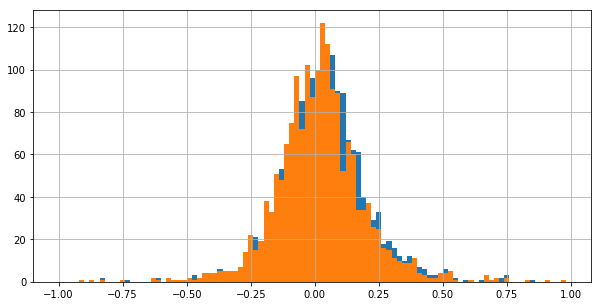

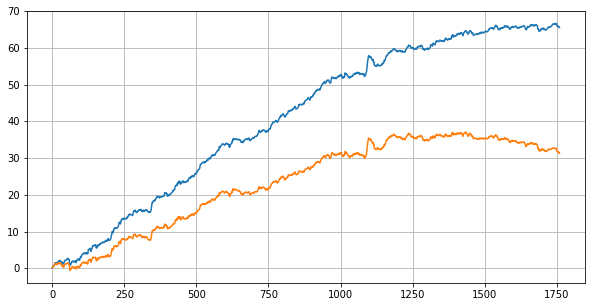

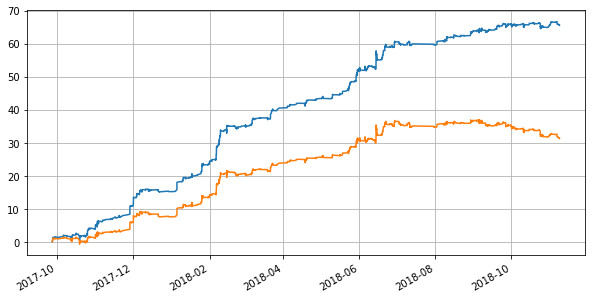

In [64]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(0)
bins = [i/100 for i in range(-100,100,2)]
histG = plt.hist(pos_under_thr['GROI'], bins=bins)
histR = plt.hist(pos_under_thr['ROI'], bins=bins)
plt.grid()

#pos_under_thr.index = range(pos_under_thr.shape[0])
plt.figure(1)
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['GROI'].cumsum())
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['ROI'].cumsum())
plt.grid()

list_dates = [dt.datetime.strptime(date, '%Y.%m.%d %H:%M:%S') for date in positions['DTo']]
dates = matplotlib.dates.date2num(list_dates)
plt.figure(2)
plt.plot_date(list_dates, pos_under_thr['GROI'].cumsum(),fmt='-')
plt.plot_date(list_dates, pos_under_thr['ROI'].cumsum(),fmt='-')
plt.gcf().autofmt_xdate()
plt.grid()
roi1 = pos_under_thr['ROI'].cumsum()
dates1 = list_dates

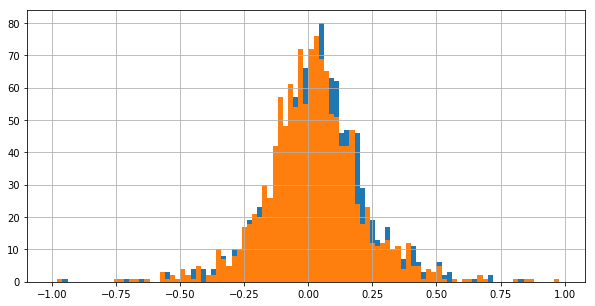

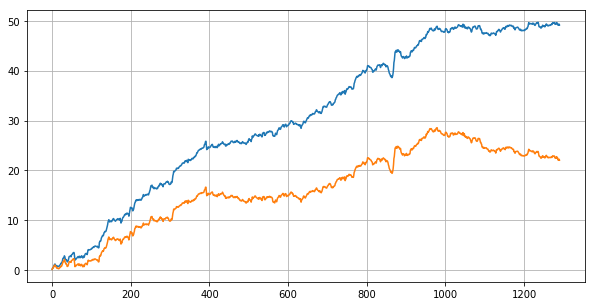

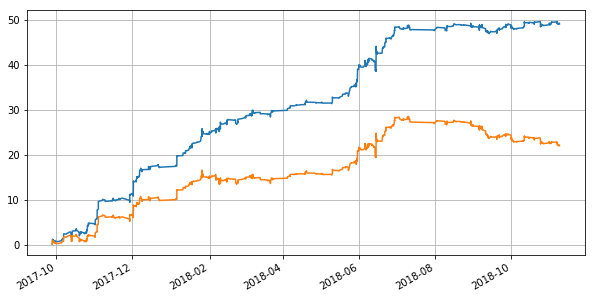

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
plt.rcParams['figure.figsize'] = [10, 5]
plt.figure(0)
bins = [i/100 for i in range(-100,100,2)]
histG = plt.hist(pos_under_thr['GROI'], bins=bins)
histR = plt.hist(pos_under_thr['ROI'], bins=bins)
plt.grid()

#pos_under_thr.index = range(pos_under_thr.shape[0])
plt.figure(1)
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['GROI'].cumsum())
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['ROI'].cumsum())
plt.grid()

list_dates = [dt.datetime.strptime(date, '%Y.%m.%d %H:%M:%S') for date in positions['DTo']]
dates = matplotlib.dates.date2num(list_dates)
plt.figure(2)
plt.plot_date(list_dates, pos_under_thr['GROI'].cumsum(),fmt='-')
plt.plot_date(list_dates, pos_under_thr['ROI'].cumsum(),fmt='-')
#plt.plot_date(dates1, roi1,fmt='-')
plt.gcf().autofmt_xdate()
plt.grid()

In [16]:
ind=pos_under_thr[pos_under_thr['Di']=='2018.06.29'].index[-1]
print(pos_under_thr['Di'].loc[ind])
print('GROI@checkpoint')
print(pos_under_thr['GROI'].loc[:ind].cumsum().iloc[-1])
print('ROI@checkpoint')
print(pos_under_thr['ROI'].loc[:ind].cumsum().iloc[-1])


2018.06.29
GROI@checkpoint
51.412956287554756
ROI@checkpoint
32.49173528904049


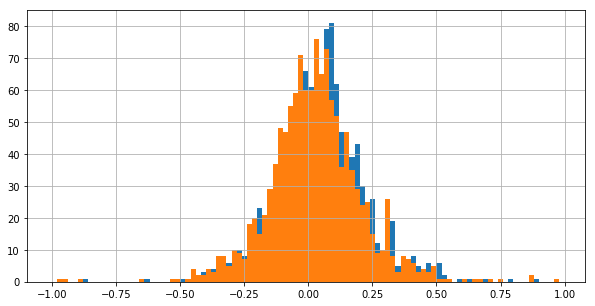

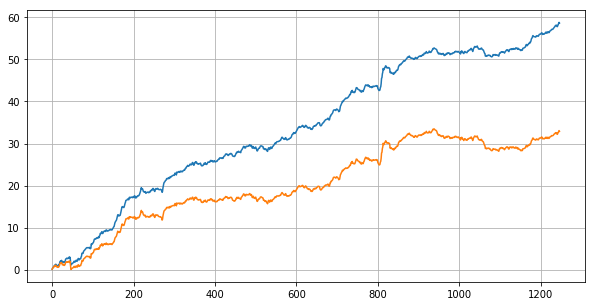

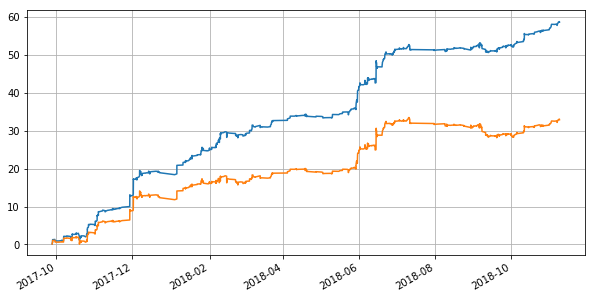

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
plt.rcParams['figure.figsize'] = [10, 5]
plt.figure(0)
bins = [i/100 for i in range(-100,100,2)]
histG = plt.hist(pos_under_thr['GROI'], bins=bins)
histR = plt.hist(pos_under_thr['ROI'], bins=bins)
plt.grid()

#pos_under_thr.index = range(pos_under_thr.shape[0])
plt.figure(1)
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['GROI'].cumsum())
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['ROI'].cumsum())
plt.grid()

list_dates = [dt.datetime.strptime(date, '%Y.%m.%d %H:%M:%S') for date in positions['DTo']]
dates = matplotlib.dates.date2num(list_dates)
plt.figure(2)
plt.plot_date(list_dates, pos_under_thr['GROI'].cumsum(),fmt='-')
plt.plot_date(list_dates, pos_under_thr['ROI'].cumsum(),fmt='-')
plt.gcf().autofmt_xdate()
plt.grid()

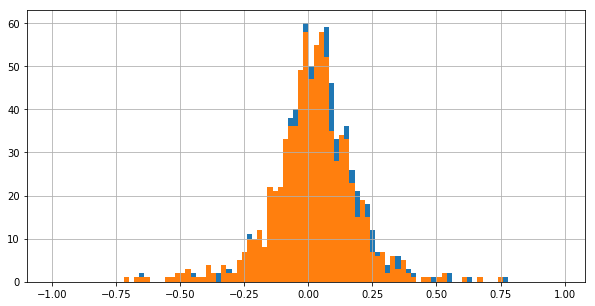

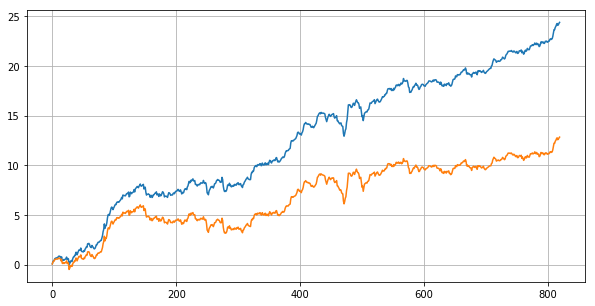

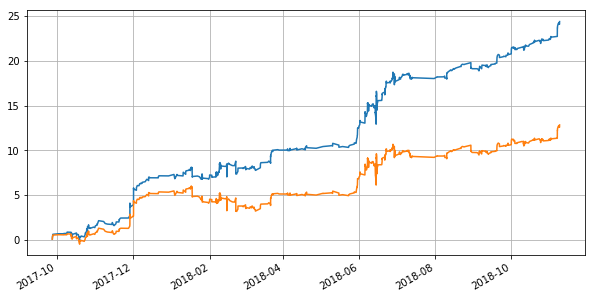

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
plt.rcParams['figure.figsize'] = [10, 5]
plt.figure(0)
bins = [i/100 for i in range(-100,100,2)]
histG = plt.hist(pos_under_thr['GROI'], bins=bins)
histR = plt.hist(pos_under_thr['ROI'], bins=bins)
plt.grid()

#pos_under_thr.index = range(pos_under_thr.shape[0])
plt.figure(1)
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['GROI'].cumsum())
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['ROI'].cumsum())
plt.grid()

list_dates = [dt.datetime.strptime(date, '%Y.%m.%d %H:%M:%S') for date in positions['DTo']]
dates = matplotlib.dates.date2num(list_dates)
plt.figure(2)
plt.plot_date(list_dates, pos_under_thr['GROI'].cumsum(),fmt='-')
plt.plot_date(list_dates, pos_under_thr['ROI'].cumsum(),fmt='-')
plt.gcf().autofmt_xdate()
plt.grid()

190405174821_RRNN01010-1CMF180410T181109ACk1-k2E12
Test dataset w. RRNN01010CMF181112T190329ACk1k2E12E14, RRNN01011CMF181112T190329ACk1k2E14E14
2


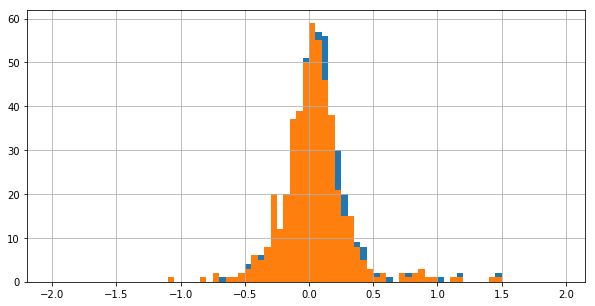

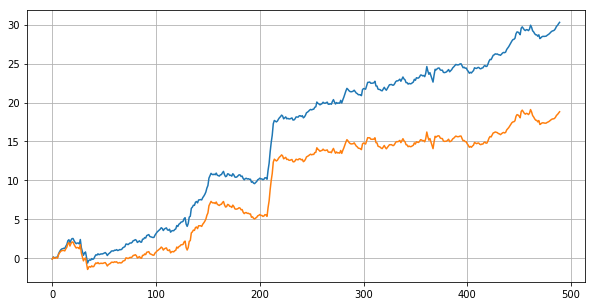

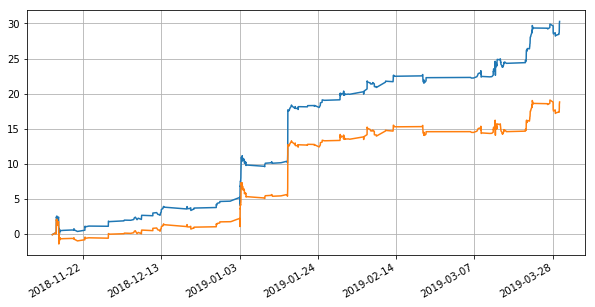

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
print(pos_filename)
print("Test dataset w. RRNN01010CMF181112T190329ACk1k2E12E14, RRNN01011CMF181112T190329ACk1k2E14E14")
mx = int(np.ceil(max(pos_under_thr['GROI'])))
mn = int(np.floor(min(pos_under_thr['ROI'])))
bins = [i/20 for i in range(20*mn,20*mx)]
plt.figure(0)
#bins = [i/100 for i in range(-100,100,2)]
histG = plt.hist(pos_under_thr['GROI'], bins=bins)
histR = plt.hist(pos_under_thr['ROI'], bins=bins)
plt.grid()

#pos_under_thr.index = range(pos_under_thr.shape[0])
plt.figure(1)
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['GROI'].cumsum())
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['ROI'].cumsum())
plt.grid()

list_dates = [dt.datetime.strptime(date, '%Y.%m.%d %H:%M:%S') for date in positions['DTo']]
dates = matplotlib.dates.date2num(list_dates)
plt.figure(2)
plt.plot_date(list_dates, pos_under_thr['GROI'].cumsum(),fmt='-')
plt.plot_date(list_dates, pos_under_thr['ROI'].cumsum(),fmt='-')
plt.gcf().autofmt_xdate()
plt.grid()
roi1 = pos_under_thr['ROI'].cumsum()
dates1 = list_dates


In [20]:
ind=pos_under_thr[pos_under_thr['Di']=='2018.10.26'].index[-1]
print(pos_under_thr['Di'].loc[ind])
print('GROI@checkpoint')
print(pos_under_thr['GROI'].loc[:ind].cumsum().iloc[-1])
print('ROI@checkpoint')
print(pos_under_thr['ROI'].loc[:ind].cumsum().iloc[-1])


2018.10.26
GROI@checkpoint
56.423661374343865
ROI@checkpoint
31.276339802601505


In [26]:
pos_under_thr.sort_values(by=['ROI'],ascending=True).reset_index()

,index,Asset,Di,Ti,Do,To,GROI,ROI,spread,espread,ext,Dir,Bi,Bo,Ai,Ao,strategy,DTo
0,28,GBPJPY,2018.11.15,12:20:26,2018.11.15,12:39:28,-1.058284,-1.075342,0.017058,0.027293,0,1,146.51800,144.98200,146.55800,145.00700,01010k1k2K5ACE1214MC7MD.6,2018.11.15 12:39:28
1,129,USDJPY,2019.01.03,01:48:16,2019.01.03,02:48:00,-0.817539,-0.828612,0.011073,0.018455,0,1,108.35400,107.47600,108.37400,107.48800,01010k1k2K5ACE14MC65MD6,2019.01.03 02:48:00
2,33,GBPUSD,2018.11.15,12:43:00,2018.11.15,13:08:33,-0.736160,-0.747784,0.011624,0.010074,0,1,1.29035,1.28083,1.29048,1.28098,01010k1k2K5ACE1214MC7MD.6,2018.11.15 13:08:33
3,34,GBPCHF,2018.11.15,12:43:43,2018.11.15,13:18:28,-0.693567,-0.736722,0.043155,0.044697,0,1,1.29706,1.28808,1.29764,1.28864,01010k1k2K5ACE1214MC7MD.6,2018.11.15 13:18:28
4,312,AUDCAD,2019.02.21,02:55:40,2019.02.21,04:00:16,-0.603159,-0.629521,0.026362,0.026362,0,1,0.94809,0.94237,0.94834,0.94262,01010k1k2K5ACE1214MC7MD.6,2019.02.21 04:00:16
5,362,GBPCAD,2019.03.12,13:04:26,2019.03.12,13:31:37,-0.568460,-0.591814,0.023354,0.027910,0,1,1.75513,1.74523,1.75562,1.74564,01010k1k2K5ACE14MC65MD6,2019.03.12 13:31:37
6,30,EURGBP,2018.11.15,12:32:22,2018.11.15,12:59:24,-0.497197,-0.509655,0.012458,0.021624,0,-1,0.87845,0.88284,0.87864,0.88295,01010k1k2K5ACE1214MC7MD.6,2018.11.15 12:59:24
7,470,GOLD,2019.03.28,16:02:05,2019.03.28,16:43:01,-0.481021,-0.501031,0.020010,0.020780,0,1,1299.05000,1292.81000,1299.32000,1293.07000,01010k1k2K5ACE1214MC7MD.6,2019.03.28 16:43:01
8,29,GBPAUD,2018.11.15,12:19:42,2018.11.15,12:40:38,-0.471280,-0.499534,0.028254,0.031080,0,1,1.76910,1.76081,1.76965,1.76131,01010k1k2K5ACE1214MC7MD.6,2018.11.15 12:40:38
9,463,GBPJPY,2019.03.28,00:50:25,2019.03.28,02:07:35,-0.450333,-0.467443,0.017110,0.025323,0,1,146.07700,145.43100,146.11400,145.45600,01010k1k2K5ACE1214MC7MD.6,2019.03.28 02:07:35
